In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Common libraries
from IPython.display import display
import matplotlib

import matplotlib.pyplot as plt
import numpy as np

import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
#export CUDA_VISIBLE_DEVICE=
#export CUDA_VISIBLE_DEVICE=0
#export CUDA_VISIBLE_DEVICE=0,1

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

import sys
from os.path import isfile, basename, join
SRC_DIR='.'
sys.path.append(join(SRC_DIR,'../code/'))
import pathlib

import minigap
#import importlib
#importlib.reload(module) 

from minigap.logging import logger

logger.debug("this")

print(minigap.__version__)

This will get logged  
hola
this 
0.0.1


In [2]:
import tensorflow as tf
print(tf.__version__)
print("{} GPU(s) recognized by tensorflow:".format(len(tf.config.list_physical_devices('GPU'))), tf.config.list_physical_devices('GPU'))

2.8.0
0 GPU(s) recognized by tensorflow: []


2022-03-08 17:37:56.641749: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-03-08 17:37:56.641798: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: logos
2022-03-08 17:37:56.641806: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: logos
2022-03-08 17:37:56.641924: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 440.118.2
2022-03-08 17:37:56.641961: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 440.118.2
2022-03-08 17:37:56.641970: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 440.118.2


In [3]:
miniGAP_parent_directory = str(pathlib.Path(minigap.__file__).parents[2])
miniGAP_parent_directory

'/home/vama/soft/python-tests/minigap/minigap'

In [4]:
miniGAP_parent_directory + "/data"

'/home/vama/soft/python-tests/minigap/minigap/data'

In [5]:
filename='/home/vama/soft/python-tests/minigap/minigap/results/librascal_distorted_propenols/miniGAP.settings'
import json
with open(filename, encoding = 'utf-8') as f:
    userset =json.load(f)

In [7]:
mgset = minigap.mgset
userset['import_fraction'] = .5
userset['train_fraction'] = 0.7
userset['lmax'] = 4
userset['nmax'] = 4
userset['n_epochs'] = 0
userset['use_forces'] = True
userset['sparse_gpflow'] = True
mgset =minigap.update_settings(mgset, userset)

s=minigap.settings_tuple(mgset)
s

Settings(date='_2022_03_08', verbose=True, print_timings=True, log_level='debug', title='librascal_distorted_propenols', make_output_files=True, save_dataset_animation=True, append_date_to_title=False, suppress_banner=False, output_energy_units='eV', output_force_units='eV/ang', color='mediumseagreen', energy_plots=['predicted_vs_true', 'global_log_error_histogram', 'global_log_error_per_atom_histogram', 'local_log_error_histogram'], crop_energy_outliers=True, energy_error_bars=True, force_plots=['predicted_vs_true', 'log_error_histogram'], force_plots_components=['x', 'y', 'z', 'magnitude', 'theta'], crop_force_outliers=True, error_stats=['rmse', 'mae', 'mxae', 'r2', 'logvae', 'linfit'], energy_type='binding', use_forces=True, dtype='float64', structure_file='distorted_propenol.db', alt_energy_keyword='U0', input_energy_units='eV', input_force_units='eV/ang', is_periodic=False, import_fraction=0.5, chemical_formula=None, diatomic_element='H', diatomic_bond_length=1.2, molecular_dynami

In [8]:
s.structure_file

'distorted_propenol.db'

In [9]:
StructureList = minigap.import_structs(s , miniGAP_parent_directory)

If you plan to use miniGAP with this dataset more than once, it is recommended that you convert this file to a .db file.             
The conversion may be slow, but this will save significant time each run of miniGAP thereafter.             
To perform this conversion, run the command 'code/convert_to_db.py /home/vama/soft/python-tests/minigap/minigap/data/distorted_propenol.db' from the minigap parent directory 
Importing 50% of dataset... 
Imported 1000 structures from distorted_propenol.db. Structures were taken uniformly from throughout dataset which contains 2000 total structures. 


In [9]:
#miniGAP_parent_directory='/home/vama/soft/python-tests/minigap/minigap/code'

In [10]:
data = minigap.dataset(StructureList,s)

In [11]:
#data.get_testid()
thedatatest  = minigap.mgtrain(data, 'test')

300
300
shift list= (300,)


In [12]:
thedatatrain  = minigap.mgtrain(data, 'train')
print(thedatatrain.sps_full.shape)

700
shift list= (700,)
(7000, 390)


In [13]:
thedatatrain.sps_full.shape

(7000, 390)

In [14]:
degree=2
#kernel = pick_kernel(s.kernel_type, amplitude=1, verbose=s.verbose, degree=degree
kernel = minigap.pick_kernel(s.kernel_type, amplitude=1, verbose=s.verbose,  degree=degree)

Using a degree 2 polynomial kernel.


2022-03-08 17:15:23.569380: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-08 17:15:23.603080: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [15]:
gg = minigap.gpr(kernel,thedatatest)
gg.model()

Training using 3000 atoms without batching.


In [16]:
#testt = thedatatest.sps_full
import timeit

predict_ens, predict_ens_var, predict_frcs =gg.predict(thedatatest)

Predicting final energies
Predicting final forces
rescale


In [17]:
#pred_ens_rescaled = thedatatest.ens_scaler.inverse_transform(predict_ens).flatten()
#pred_ens_rescaled = minigap.convert_energy(pred_ens_rescaled, "eV", s.output_energy_units)

def get_global_ens(pred_ens_local, dataobj):
    pred_en_shifts = minigap.convert_energy(dataobj.en_shift_list, "eV", dataobj.settings.output_energy_units)
    pred_global_ens = (dataobj.struct_bools @ pred_ens_local).flatten() + pred_en_shifts
    return pred_global_ens

pred_globale = get_global_ens(predict_ens, thedatatest)
# pred_global_ens.shape
    
# pred_en_shfts = minigap.convert_energy(thedataval.en_shift_list, "eV", s.output_energy_units)
# pred_global_ens = (thedataval.struct_bools @ pred_ens_rescaled).flatten() + pred_en_shfts
pred_globale.shape

(300,)

In [18]:
structest = data.getstruc_test()
truens=np.array([minigap.get_ase_energy(atoms) for atoms in structest])
    
truens.shape

(300,)

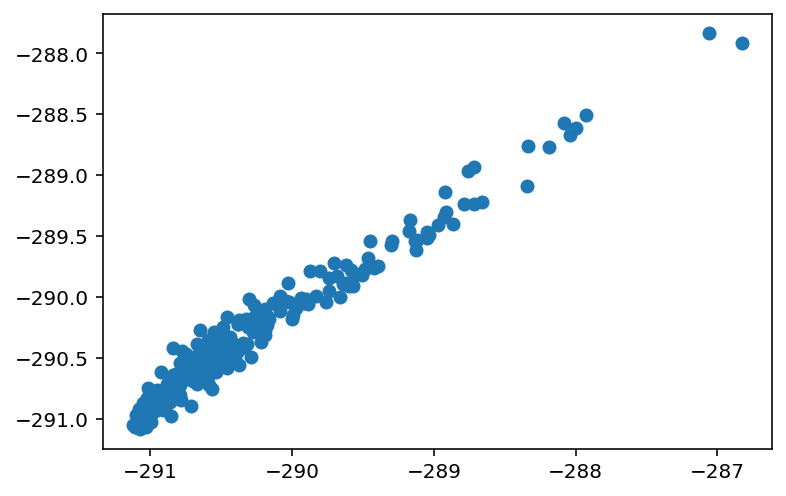

0.2067417975089423

In [19]:

# # Fixing random state for reproducibility
# np.random.seed(19680801)

x= truens
y= pred_globale

#x = np.array(truens)
#y = predict_global_ens
# s = np.random.rand(*x.shape) * 800 + 500

plt.scatter(x, y)
# plt.xlabel("Leprechauns")
# plt.ylabel("Gold")
# plt.legend(loc='upper left')
plt.show()


y =  truens -  pred_globale
ms = np.sqrt(np.mean(y**2))
ms

In [29]:
mgset = minigap.mgset
userset['import_fraction'] = .5
userset['train_fraction'] = 0.7
userset['lmax'] = 4
userset['nmax'] = 4
userset['n_epochs'] = 1
userset['use_forces'] = True
userset['sparse_gpflow'] = True
mgset =minigap.update_settings(mgset, userset)

s=minigap.settings_tuple(mgset)
s.lmax

4

Break Train set and get validation

In [30]:
dataval = minigap.dataset(data.getstruc_train(),s)
len(dataval.getstruc_train())

489

In [31]:
thedataval  = minigap.mgtrain(dataval, 'train')

489
shift list= (489,)


In [32]:
thedataval2  = minigap.mgtrain(dataval, 'test')

211
211
shift list= (211,)


In [33]:
gg = minigap.gpr(kernel,thedataval)

Training using 4890 atoms without batching.


In [34]:
gg.optimize(thedataval2)

here0
here <minigap.data.mgtrain object at 0x7ff6dcc24460> 1
Epoch 0
Using older approach (not converted to tf.function yet)
╒═════════════════════════╤══════════════════╤══════════════════╤═════════╤═════════════╤═════════════╤═════════╤══════════════════════════════════════════════════════╕
│ name                    │ class            │ transform        │ prior   │ trainable   │ shape       │ dtype   │ value                                                │
╞═════════════════════════╪══════════════════╪══════════════════╪═════════╪═════════════╪═════════════╪═════════╪══════════════════════════════════════════════════════╡
│ GPR.kernel.variance     │ Parameter        │ Softplus         │         │ True        │ ()          │ float64 │ 1.0004824804495756                                   │
├─────────────────────────┼──────────────────┼──────────────────┼─────────┼─────────────┼─────────────┼─────────┼──────────────────────────────────────────────────────┤
│ GPR.kernel.degree       │ Pa

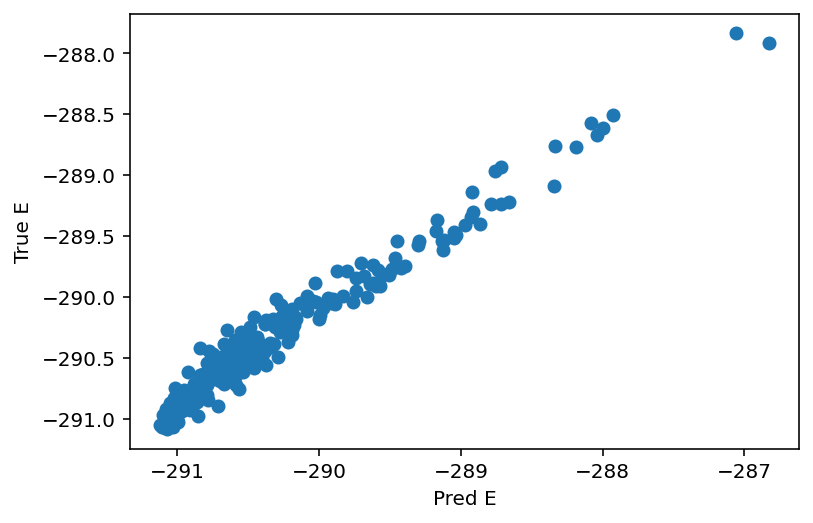

MSE = 0.2067417975089423


In [37]:
#pred_ens_rescaled = thedatatest.ens_scaler.inverse_transform(predict_ens).flatten()
#pred_ens_rescaled = minigap.convert_energy(pred_ens_rescaled, "eV", s.output_energy_units)

def get_global_ens(pred_ens_local, dataobj):
    pred_en_shifts = minigap.convert_energy(dataobj.en_shift_list, "eV", dataobj.settings.output_energy_units)
    pred_global_ens = (dataobj.struct_bools @ pred_ens_local).flatten() + pred_en_shifts
    return pred_global_ens

pred_globale = get_global_ens(predict_ens, thedatatest)
# pred_global_ens.shape
    
# pred_en_shfts = minigap.convert_energy(thedataval.en_shift_list, "eV", s.output_energy_units)
# pred_global_ens = (thedataval.struct_bools @ pred_ens_rescaled).flatten() + pred_en_shfts
pred_globale.shape

structest = data.getstruc_test()
truens=np.array([minigap.get_ase_energy(atoms) for atoms in structest])
    
truens.shape


# # Fixing random state for reproducibility
# np.random.seed(19680801)

x= truens
y= pred_globale

#x = np.array(truens)
#y = predict_global_ens
# s = np.random.rand(*x.shape) * 800 + 500

plt.scatter(x, y)
plt.xlabel("Pred E")
plt.ylabel("True E")
#plt.legend(loc='upper left')
plt.show()


y =  truens -  pred_globale
ms = np.sqrt(np.mean(y**2))
print('MSE = {}'.format(ms))


In [79]:
thedatatrain  = minigap.mgtrain(data, 'train')
print(thedatatrain.sps_full.shape)

700
shift list= (700,)
(7000, 390)


In [96]:
#minigap.sparsify(thedatatrain,thedatatest,sparsify_samples=True, n_samples=100, sparsify_features=True, n_features=100)
minigap.sparsify(thedatatrain,thedatatest,sparsify_samples=True, n_samples=600, sparsify_features=False)
print(thedatatrain.sps_sparse.shape)

/home/vama/install/local/anaconda3/envs/minigapcpu/lib/python3.9/site-packages/skcosmo/utils/_orthogonalizers.py:57: UserWarning: Column vector contains only zeros.
  warnings.warn("Column vector contains only zeros.")


CUR sample selection
(365, 390)


In [82]:
degree=2
#kernel = pick_kernel(s.kernel_type, amplitude=1, verbose=s.verbose, degree=degree
kernel = minigap.pick_kernel(s.kernel_type, amplitude=1, verbose=s.verbose,  degree=degree)

Using a degree 2 polynomial kernel.


In [83]:
gg = sgpr(kernel,thedatatrain)

Training using 7000 atoms without batching.


In [84]:
gg.model()

In [85]:
thedatatest.sps_full.shape

(3000, 390)

In [86]:
#testt = thedatatest.sps_full
predict_ens, predict_ens_var, predict_frcs =gg.predict(thedatatest)

Predicting final energies
Predicting final forces
rescale


In [87]:
predict_ens[:10]

array([ 54.98645477,   9.02765086,   9.02690298,   9.01535162,
       -22.50915369, -22.53900996, -22.498738  , -22.53252794,
       -22.54307553, -22.53768419])

In [88]:
#pred_ens_rescaled = thedatatest.ens_scaler.inverse_transform(predict_ens).flatten()
#pred_ens_rescaled = minigap.convert_energy(pred_ens_rescaled, "eV", s.output_energy_units)

def get_global_ens(pred_ens_local, dataobj):
    pred_en_shifts = minigap.convert_energy(dataobj.en_shift_list, "eV", dataobj.settings.output_energy_units)
    pred_global_ens = (dataobj.struct_bools @ pred_ens_local).flatten() + pred_en_shifts
    return pred_global_ens

pred_globale = get_global_ens(predict_ens, thedatatest)
# pred_global_ens.shape
    
# pred_en_shfts = minigap.convert_energy(thedataval.en_shift_list, "eV", s.output_energy_units)
# pred_global_ens = (thedataval.struct_bools @ pred_ens_rescaled).flatten() + pred_en_shfts
pred_globale.shape

(300,)

In [89]:
structest = data.getstruc_test()
truens=np.array([minigap.get_ase_energy(atoms) for atoms in structest])
    
truens.shape

(300,)

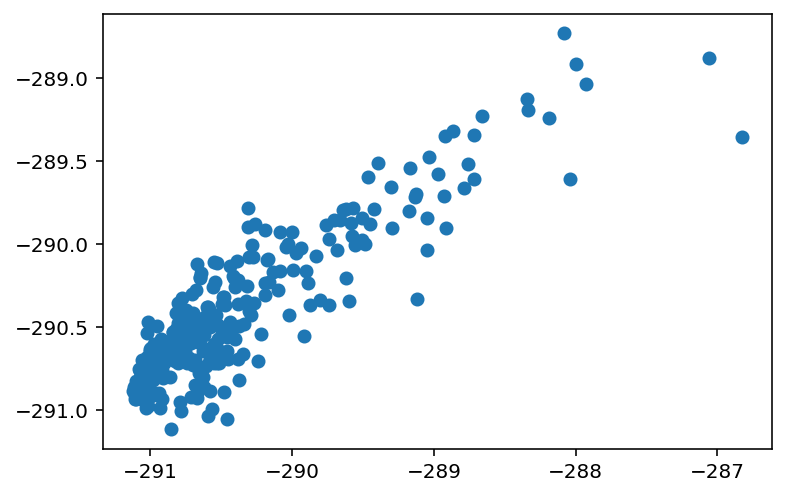

0.3906781694498966

In [54]:

# # Fixing random state for reproducibility
# np.random.seed(19680801)

x= truens
y= pred_globale

#x = np.array(truens)
#y = predict_global_ens
# s = np.random.rand(*x.shape) * 800 + 500

plt.scatter(x, y)
# plt.xlabel("Leprechauns")
# plt.ylabel("Gold")
# plt.legend(loc='upper left')
plt.show()


y =  truens -  pred_globale
ms = np.sqrt(np.mean(y**2))
ms

In [90]:
predict_frcs.shape

(3000, 3)

In [91]:
predict_frcs[:5]

array([[ 7.48672813, -3.86536187,  3.00928628],
       [ 1.59677222, -1.77887099, -3.00883682],
       [-5.65218511,  0.09596642,  1.7408573 ],
       [ 0.901414  , -3.18075952,  2.20430072],
       [-3.97460512, -2.97028122, -3.11350599]])

In [92]:
predict_frcs[:,0].shape

(3000,)

In [93]:
thedatatest.frcs[:,0]

array([ 0.22028894, -0.08014157, -0.07918235, ...,  0.07647048,
        0.0037277 , -0.00488026])

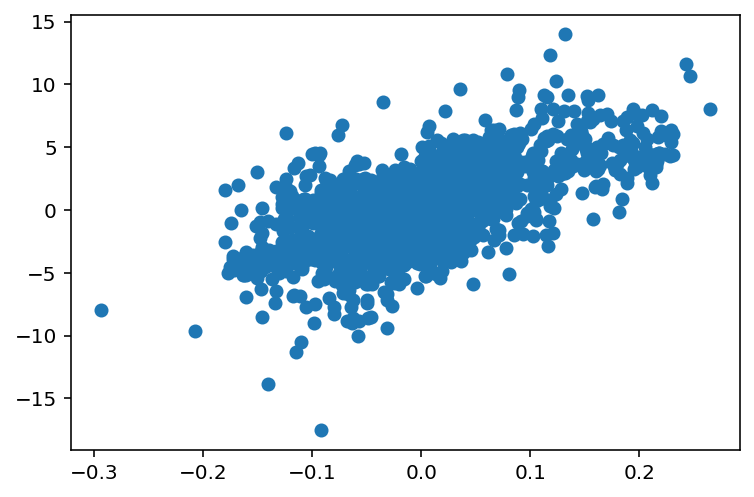

2.7628227473279816

In [94]:

# # Fixing random state for reproducibility
# np.random.seed(19680801)

x= thedatatest.frcs[:,0]
y= predict_frcs[:,0]

#x = np.array(truens)
#y = predict_global_ens
# s = np.random.rand(*x.shape) * 800 + 500

plt.scatter(x, y)
# plt.xlabel("Leprechauns")
# plt.ylabel("Gold")
# plt.legend(loc='upper left')
plt.show()


y =  thedatatest.frcs[:,0] -  predict_frcs[:,0]
ms = np.sqrt(np.mean(y**2))
ms